## Decision Tree

A decision tree is a graph that uses a branching method to illustrate every possible outcome of a decision. Lets start by taking a example of OR of two variables X1 and X2. The decison tree for the same is shown below :
<br>
<img src="OR_DT.png">
We have total four possible combinations as shown in the truth table. So at the beginning we have 2 True and 2 False outcomes to start with. The first condition we check for is the value of X1. If X1 is true then we are sure that the result will be true and hence we arrive at 2 true and no false. Note that ,we only consider those rows of the table which are having X1 as true i.e. the first and the third row in the current example .That is why we have 2 total outcomes out of which 2 are true and none is false. This node is having a definite answer.If we arrive at this node there is no confusion as to which what our tree should return, therefore these are called <b>pure nodes</b>.<br>
If X1 is false then the answer is dependant on the value of X2. If X2 is false the answer is false and if the answer is true the final result is true. We have three pure nodes here as shown in the pictorial representation of the decision tree.
Now if we are given any new data for prediction we just need to run it through our tree. For example if we get A and B as two values for testing. We check first if A is true. If A is true we have true as our answer else we need to check for the value of B. If B is true then our answer agin is true else we have false as the final outcome.
Lets consider another example which is not as straight forward as the previous one. Suppose we need to predict that if a person will get interview call or not based on some factors. There can be many factors but for simplicity lets consider that we focus on the level of projects, good inten and whether the person is from top 50 colleges or not.<br>
Unlike the previous example in which we just picked X1 for the first decision, it is quite arguable that which factor should we pick first here. Lets assume that we start by picking whether the person has done a good internship or not(which is in the form of true or false).
<img src="DT_interview.png">
<br>
Similarly we continue to break down the nodes further on the basis of the features which are still left(type of college and projects in this case ).<br/>
Consider a case where we have used up all the features and still we do not arrive at a pure node. Cases like this can surely be true. For eg: we may have three students lacking in all the three fields but still one gets the interview call and the other two do not. In such a case, our node which corresponds to "no" at each of the above three decisions cannot give a pure no as answer i.e. it is not a pure node. What should we do then? As we do not have anymore features left to judge on, we can simply favour the majority class of the node.<br>
Therefore, there are two cases when we need to stop with the breaking of nodes into subparts, those are :<br>
1) When we have a pure node, there is no need to proceed further.<br>
2) When all the features are used and we dont have any other feature present.
<br>
Depending upon which factor we pick to split on we can have different Decision trees and their accuracy will also vary. We will discuss how to pick a decent tree in the next section. What we should note is that till now we have only considered the examples where we have binary( true or false ) as outcomes. If a partucular feature has n different values, we may have to break a node into n subnodes. If a feature has all unique entry then we reach the pure nodes in one step but for many cases that is useless. For example, dividing a class of students on the basis of their roll number into subnodes may result in all pure nodes but it is of no use.

## Best Decision Tree

Building a decision tree involves deciding on which feature to choose and what condition to use on splitting, alongwith knowing when to stop.
In the first split on the root, all features are considered and the data points are divided into groups based on this split. Lets suppose, we have n features. Then we will be having n candidate splits at the first level. Now, we will calculate how much accuracy each split will cost us, using a function. The split(feature) which results in maximum accuracy is choosen at this level and data points are divided into child nodes according to that feature only. The child nodes formed are recursively divided into deeper levels, resulting in formation of the entire tree.

In the case we have n features, then we can possibly make exponential number of decision trees. It is categorised into NP-HARD Problem. For finding out the best tree all possible combinations of tree possible should be taken care off. So, we are interested here to find out the good tree and not the best one. Using the GREEDY approach, we will try to lower the cost (and also maximize the accuracy) and according to this, build a good decision tree.

## Choose feature to split on (on the basis of accuracy)

Taking the same example of the student applying for an internship in college will get a call for the interview or not. Considering total 50 students, we will pick up all the features one by one and see how many mistakes we make at each level, taking the decision on the basis of majority. Majority decision means that if we have <b>10 YES and 40 NO</b> in particular node, then we will take our decision as NO for that node.

<img src="feature_1.jpeg" width="700">

At the root node, we will take our decision as NO according to majority, then we make a total of 10 mistakes. So, it is represented as 10/50(10 out of 50) are wrong decisions. <br/>
Furthur, if we split the data points on the feature "Great Intern", then left node represents students who are great interns, total of 8 students, out of which 5 got a call for interview and 3 didn't. Right node similarly reprents students who are not great interns, total of 42 students, and again out of which 5 got a call for interview and 37 didn't. So, we take our decision as YES for left side child node and NO for side side child node (according to majority only). And we make a total of 8(3+5) mistakes at this level, which actually means that before using this features, if we took decision at root node only we make 10 mistakes in our decision, while after splitting on this feature we make a total of 8 mistakes at this level. Since, we are making less number of mistakes in our decision at lower level, so it will be benificial and serve as an advantage in decision making if we make a split at this level.

<img src="feature_2.jpeg" width="700">
<br/>
Similarly, here we are making 10 mistakes at the root level, but after splitting we are making a total of 6(2+4) mistakes in decision at the lower level, and hence this split is also favoured at this step of splitting.

<img src="feature_3.jpeg" width="700">
<br/>
Here, we are making total of 10 mistakes at root level, but after splitting also we are making 10(5+5) mistakes, so we might possibly avoid split using this feature.

<img src="tree_legends.jpeg" width="700">
<br/>
We will make a split using that feature by which number of mistakes made at the lower level of the tree gets reduced after a split is performed using that feature. Therefore, here we will make a split using second feature i.e. <b>Top College</b>

##  Handle discrete and continuous value features

If we have discrete value feature, say labelled data for example gender of a person we have Male and Females. Now, making a split on gender of person results in 2 child nodes, one for males and other for females.
<br/>
Consider continuous valued features, say salary. Every person has different salary and values are spread over a wide range. If we have to make a split on Salary, then an option is to make different child node for every different value of salary we obtain. But unfortunately, it will result in large overfitting of data.
<br/>
So, to avoid this difficulty for continuous value features. We follow the procedure mentioned to achieve the better split using this feature.

1. Spread all the salaries(values for feature choosen) on the straight line from lowest to highest order.
2. Split the data according to mid point values, taking all the pairwise adjacent points.
3. Take the salary value for that particular split that results in maximum accuracy or minimum mistakes made while making the decision. 

Example, we have 4 value of salaries, 5000, 10000, 20000 and 50000.
We take the mid point of all these which comes out to be 7500, 15000 and 35000.
We will make a split on all these salary values one by one, first on 7500 salary, which means people with salary less than 7500 come on left side and all others on the right side. 
Similarly, doing for salary values 15000 and 35000.
We choose that particular salary value to make a split at this level which results in maximum accuracy.

This process is followed for making a binary split for the continuous value features. We can choose salary feature again at the deeper level and make a split again using this feature below, with decreased range.

##  Code using sklearn decision tree

In [1]:
#Importing libraries

from sklearn import datasets
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

In [2]:
#Loading IRIS dataset

from sklearn.datasets import load_breast_cancer
brca= load_breast_cancer()

df=pd.DataFrame(brca.data,columns=brca.feature_names)
y=brca.target

In [3]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
df.shape

(569, 30)

In [11]:
#Using decision tree classifier of sklearn
#https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df,y,test_size=0.2)
clf = DecisionTreeClassifier(max_depth=2)
clf.fit(x_train,y_train)



0.9420035149384886

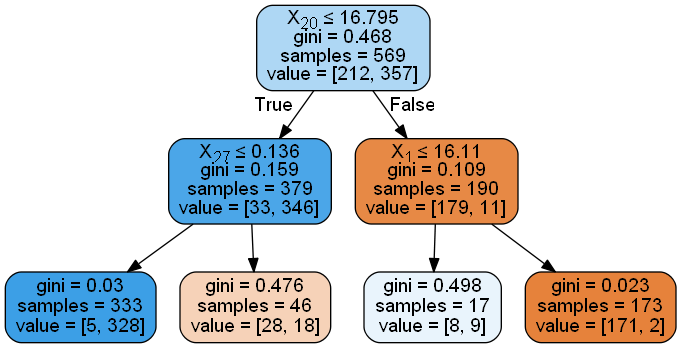

In [6]:
#Printing the decision tree formed using pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())

In [7]:
clf.predict(df)-y

array([ 1,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,
        0,  0,  0,  0,  1,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  1,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  1,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0, -1,
        0,  0,  0,  0, -1,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

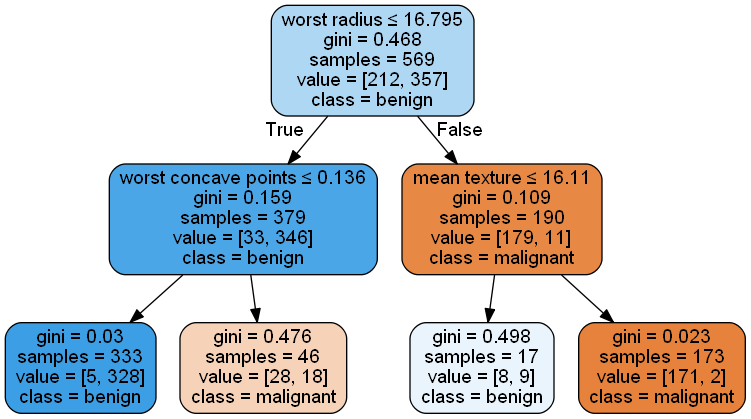

In [10]:
# Printing tree alongwith class names
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names = brca.feature_names, class_names = brca.target_names)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())

## INFORMATION GAIN 

The information gain is based on the decrease in entropy after a dataset is split on an attribute(feature). Constructing a decision tree is all about finding attribute that returns the highest information gain (i.e., the most homogeneous branches).

Entropy is basically the randomness in the decision tree . For example if we have pure nodes(having only one class) we say that the entropy is minimum,on the contrary if we have 50% of class A and 50% of class B in a node we say that the entropy is maximum.

 <img src="info_gain_3.jpeg" width="700">

Maximizing [Entropy(old) - Entropy(new)] is information gain as we are going towards more pure or homogeneous nodes. We take weighted average of the entropies of two nodes to get the resultant entropy at the level .For example:

 <img src="info_gain_2.jpeg" width="400">

Now consider a situation where we are predicting whether or not a person will get loan or not. If we split our data on the basis of name, then we will be getting lowest entropy and pure nodes, but that would majorly result in one node having one data point and overfitting will take place. Therefore Information Gain cannot be the only criteria on the basis of which we make our decision to split, rather we should also take in consideration the number of resulting nodes.

 <img src="info_gain_4.jpeg" width="300">

### Split number

In [ ]:
Split number determines the degree of split i.e more the number of split more will be the split number.

 <img src="info_gain_5.jpeg" width="700">
 <br/>
 <img src="info_gain_6.jpeg" width="700">

Therefore we define our measure on the basis of which we will split on an attribute(or feature) considering both Information gain and Split number . <h4>Gain Ratio = [Information Gain / Split Number].</h4>

More the gain ratio more favorable is the split .

<h4>Gini Index</h4>

Gini Index is another measure on the basis of which we decide on which feature to split on. This is used internally in the inbuild Decision tree in Sklearn library .

 <img src="gini_1.jpeg" width="400">

Gini Index favors larger partitions. It uses squared proportion of classes.
For a perfectly classified i.e pure node ,Gini Index would be zero.
We want a variable split that has a low Gini Index.

<img src="gini_2.jpeg" width="700"/>
 <br/>
 <img src="gini_3.jpeg" width="700"/>

In the above shown split we have moved from GI 0.6666 to GI of 0.3333 . A low value of Gini Index is desirable.

Generally whenever we are using Gini Index as a measure for split we do binary split . Inbuild Decision tress also uses Gini Index .

## Pruning

Pruning is a technique in machine learning that reduces the size of decision trees by removing sections of the tree that provide little power to classify instances. Pruning reduces the complexity of the final classifier, and hence improves predictive accuracy by the reduction of overfitting.<br>
Consider the two D-Trees shown below:<br>
<img src="pruning_one.png">
As we can see , the first tree is less complex than the second tree. Complexity can increase due to Depth as well as the nodes at a level. We cannot decide just on the basis of Depth or just on the basis of number of nodes at a level.<br>
We add to our original cost a parameter lamda(λ) so that <br><br>
<b>Cost = Error_function(Training data) + λ*L(T)</b>
<br>where, λ=controlling factor and L(T)=no. of leaf nodes.<br>
We start from the bottom of the tree and check for each split. As we encounter a split we decide if we want to keep that split or if we should keep the parent node of that split instead based upon the entropy and cost function of both the situations. If we decide to keep the split, we also have to keep all the splits above that particular split.
<br>Consider the example shown below of a D-Tree of getting an interview call based upon good project , great intern and the type of college.
<img src="DT_pruning.png"><br>
without pruning we have our cost as 0.02 + 0.05 = 0.07 ( taking λ as 0.01 ans 1/50 from error function )
<br>After first pruning we have 0.02+0.04 = 0.06, therefore we remove the first split and do pruning.
<br>Now if we undo the second split also i.e. do pruning 2nd time as shown above, we get cost = 0.12+0.03=0.15 . Here error has increased too much, therefore, we should keep the split as it is. Because we are keeping this split we need to keep all the splits above this also.